# How to Get Usage Stats out of Terraform Cloud or Enterprise

## Overview

People often want to know how their Terraform Cloud is being utilized. Or, maybe they are considering going from Terraform Enterprise to TFC and need usage information. They want to know how many applies they did this month versus last month. Or, how many total plans and applies were last year?

In the tutorial, I will cover three ways to find this information not including asking your HashiCorp buddy.

## Behind the scenes

All TFC run data is available via the [Runs API](https://www.terraform.io/docs/cloud/api/run.html). For org-level information, you need to iterate through each workspace. At the workspace-level, the API provides paged output. Each API response by default returns 20 runs. If you want to explore a specific time interval, you’ll have to page through the data to find all relevant runs for your time period.

The following tools will iterate through all the relevant data and piece together individual and grand totals.

## Prerequisites

You’ll need the following items for all three methods:

* **TFC Server** - The DNS name where your TFC/E is located. The default is `app.terraform.io` for HashiCorp Terraform Cloud.
* **TFC Organization** - The name of the organization you would like to query.
* **TFC Token** - The TFC token to use with enough permissions to list workspaces and read the Runs API. For more information on generating tokens, please read:
 [https://www.terraform.io/docs/enterprise/users-teams-organizations/users.html#api-tokens](https://www.terraform.io/docs/enterprise/users-teams-organizations/users.html#api-tokens) 

Set these values as environment variables

In [ ]:
export TF_ADDR=https://app.terraform.io
export TF_TOKEN=REPLACE_ME

In [ ]:
MAIN_DIR=${PWD} && echo $MAIN_DIR

## Terraform Cloud/Enterprise Activity Meter

Written by Ranjit [WhatsARanjit](https://whatsaranjit.github.io/)

Links:
* https://whatsaranjit.github.io/terraform/2020/10/20/TFC_Activity/
*  [TFC/E Activity Meter Web App](https://whatsaranjit.herokuapp.com/hashicorp/tfc_activity)
*  [WhatsARanjit/magicbox API](https://github.com/WhatsARanjit/magicbox#api10tfc_activity)

The interface at:
 [https://whatsaranjit.herokuapp.com/hashicorp/tfc_activity](https://whatsaranjit.herokuapp.com/hashicorp/tfc_activity) 
…allows you to query a Terraform Cloud/Enterprise organization and find out how much of a thing you are doing for a given period of time.

### Usage

1. Go to [https://whatsaranjit.herokuapp.com/hashicorp/tfc_activity](https://whatsaranjit.herokuapp.com/hashicorp/tfc_activity) in your browser.
1. Provide Server, Org, and Token.
	1. **TFC Server** - Enter the DNS name of your TFC/TFE server. Defaults to `app.terraform.io`, which is Terraform Cloud. will be used (the web app needs access to your DNS name to work).
	1. **TFC Organization** - The name of the organization you would like to query.
	1. Provide the TFC token to use.  [https://www.terraform.io/docs/enterprise/users-teams-organizations/users.html#api-tokens](https://www.terraform.io/docs/enterprise/users-teams-organizations/users.html#api-tokens) 
	1. Hit the `Retrieve Workspace` button.
1. Provide filtering criteria
	1. Select a workspace or click the `All Workspaces` checkbox.
		1. I clicked `All Workspaces`.
	1. Enter Start and End dates.
		1. I clicked `Last 6 months`
	1. Select a Metric to filter run types or click the `All Runs` checkbox.
		1. I clicked `All Runs`<br>
		1. For cleaner results, I select `Plans & Applies` and un-check `All Runs`.
		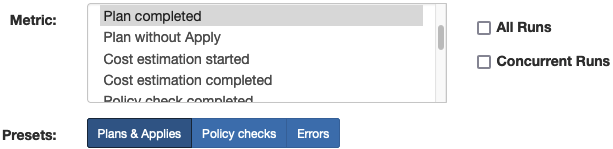
		1. Click [here](https://whatsaranjit.github.io/terraform/2020/10/20/TFC_Activity/#setup) for more information on the metrics.
	1. Hit the `Retrieve Activity` button.
1. Examine the output
	1. The json output provides details for each workspace and totals for all workspaces.
	1. The bar chart provides details on the totals over the time range. You can select a range in the bar chart to zoom in.

### Sample Output

JSON output

```json
{
  "workspaces": {
    "vault-login-demo": {},
    "terraform_ansible": {
      "Apply completed": 12,
      "Plan completed": 31
    },
    "hashicat-aws": {},
    "sub-2a": {
      "Apply completed": 2,
      "Plan completed": 2
    },
<snip>
  },
  "totals": {
    "Apply completed": 19,
    "Plan completed": 41
  }
}
```

Runs over time bar chart

<img src=attachment:08d22e7b-ac93-4901-b2b4-ba6ecc219c13.png width=640>
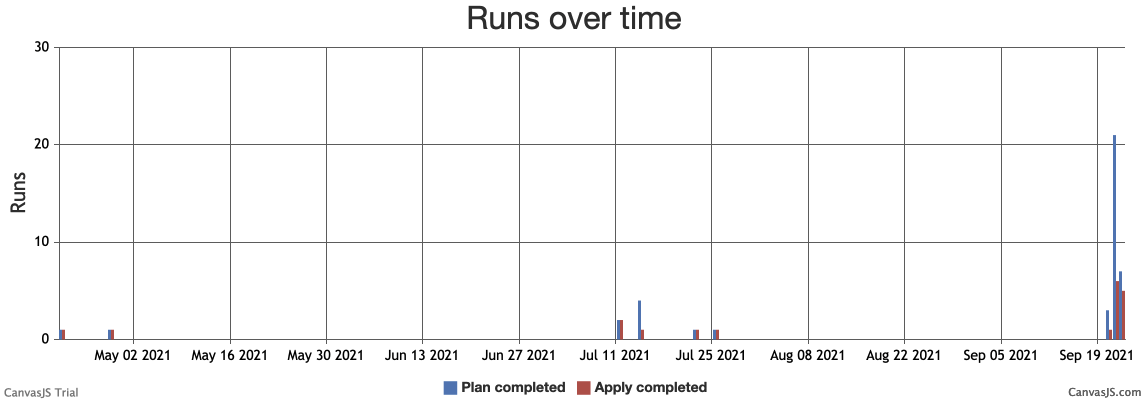

## terraform-enterprise-counter

* Author: Guy Barros
* Links:
  *  [terraform-enterprise-counter](https://github.com/GuyBarros/terraform-enterprise-counter)

A simple project to count Organizations, Workspaces and Runs.

### Setup

This project requires some environment variables to run:

| Variable | Default | Description |
| --- | --- | --- |
| `TFE_ADDR` | `app.terraform.io` | URL of the TFE instance you want to query |
| `TFE_TOKEN` | null | API Token to use. Code will try and find all resources this token has access to. Will generate an error if not provided. |
| `TFE_SITE_ADMIN` | `false` | if `true`, token has site admin privileges, use admin api; if `false`, use the token to list all the Organizations it has access to. Then, list all the workspaces in each org and count the runs for each workspace. this all goes into a dict list, which is sent to `pandas` as a Dataframe. |
| `TFE_FILTER_START_DATE` | `31.12.2020` | start date in `dd.mm.yyyy` format; runs and applies before this date will be ignored |
| `TFE_FILTER_END_DATE` | `today()` | end date in `dd.mm.yyyy` format; runs and applies after this date will be ignored |

### Sample Output

Example output of the project:

```bash
                            name  workspace_count  total_runs
0                 andygrifdemo                   2          24
3         emea-se-playground-2019               20         243
4            example-organization               12         158
6                       GuyBarros                5           0
7              Hashicorp-neh-Demo               20         135
8           hc-emea-sentinel-demo                8          47
<snip>
11                    rgustso                    6          58
12                   RogerBe                    20         242
13                      rusty-pro               15         148
15                  SNOW-se-demos               20          58
16                  TaimurKOrg                   2          14
'Total workspaces count: 167'
'Total runs count: 1503'
```

NOTE: Some organizations were omitted so the sums wont add up.

In [ ]:
GIT_GUY_DIR=config/terraform/terraform-enterprise-counter
mkdir -p $GIT_GUY_DIR

In [ ]:
git clone https://github.com/GuyBarros/terraform-enterprise-counter ${GIT_GUY_DIR}

### Usage

In [ ]:
pushd ${GIT_GUY_DIR}

### running the code
> there are different choices: python, binary, docker. all the options work in similar fashion:<br>
export the env variables and run the code 😀.

#### Export Environment Variables

In [ ]:
export TFE_ADDR=${TF_ADDR}
export TFE_API_TOKEN=${TF_TOKEN}
export TFE_SITE_ADMIN=false
export TFE_FILTER_START_DATE='01.04.2021'
export TFE_FILTER_END_DATE='01.10.2021'

#### Run Code - Python

Install prerequisites (assuming you already have Python 3.9+)

In [ ]:
pip install pandas yaspin

In [ ]:
python main.py

Expected Output
```shell
    name  workspace_count  total_runs  total_applies
0  pphan               21          54             19
'Total workspaces count: 21'
'Total runs count: 54'
'Total applies count: 19'
'from 2021-04-01 00:00:00 to 2021-10-01 00:00:00'
```

#### Run Code - binary 

The Binaries for different OSes can be downloaded from `releases`.

In [ ]:
wget https://github.com/GuyBarros/terraform-enterprise-counter/releases/download/v0.0.1/tfe_counter_darwin_amd64 \
  && chmod +x tfe_counter_darwin_amd64

In [ ]:
./tfe_counter_darwin_amd64

## Peyton

Provides the following information:
* Total Users
* Total Workspaces
* Total Successful Runs
* Succesful Applies per Month
* Apply Execution Time Histogram
* Terraform OSS Version Matrix

### Setup

In [ ]:
cd $MAIN_DIR
GIT_PEYTON_DIR=config/terraform/tfe-usage-stats
mkdir -p $GIT_PEYTON_DIR

#### Clone Repo

In [ ]:
git clone https://github.com/peytoncasper/tfe-usage-stats ${GIT_PEYTON_DIR}

In [ ]:
cd ${GIT_PEYTON_DIR}

### Usage

Build go package.

In [ ]:
go build cmd/tfe-usage-stats.go

Set variables.

In [ ]:
export TFE_ADDR=${TF_ADDR}
export TFE_API_TOKEN=${TF_TOKEN}

Run command and specify variables.

In [ ]:
./tfe-usage-stats -host="${TFE_ADDR}" -token="${TFE_API_TOKEN}"

### Sample Output

```shell
Total Users: 7
Total Workspaces: 30
Total Successful Runs: 85
Succesful Applies per Month: 
48.0 |                                                                                                                                             ██████████                 
43.2 |                                                                                                                                             ██████████                 
38.4 |                                                                                                                                             ██████████                 
33.6 |                                                                                                                                             ██████████                 
28.8 |                                                                                                                                             ██████████                 
24.0 |                                                                                                                                             ██████████                 
19.2 | ██████████                                                                                                                                  ██████████                 
14.4 | ██████████                                                                                                                                  ██████████                 
 9.6 | ██████████                                                                                                      ██████████                  ██████████                 
 4.8 |_██████████____________________________________________________________██████████________________________________██████████__________________██████████_________________
       2020-11-01    2020-12-01    2021-01-01    2021-02-01    2021-03-01    2021-04-01    2021-05-01    2021-06-01    2021-07-01    2021-08-01    2021-09-01    2021-10-01    

Apply Execution Time Histogram: 
p50 [   42 /   85 ]       72.4s: ██████████████████████████████
p75 [   63 /   85 ]       89.0s: █████████████████████████████████████
p90 [   76 /   85 ]      106.1s: ████████████████████████████████████████████
p95 [   80 /   85 ]      112.3s: ███████████████████████████████████████████████
p99 [   84 /   85 ]      118.5s: ██████████████████████████████████████████████████

Version Matrix:
 .29 |           6                        
 .14 |     1                              
  .9 |           1                        
  .7 |                 2     1            
  .6 |                 3                  
  .3 |                             2      
  .0 |                 2     6           6
        0.11  0.12  0.13  0.14  0.15   1.0
```

## Conclusion

The goal of this tutorial is to enable you to get a sense of the level of activity your organization is experiencing. Unseen patterns could emerge. Maybe one of your policies creates an inordinate number of hard-fails. Or maybe one workspace in particular has a ton more error runs than others. How much legacy code are you running.

## Clean Up

Remove artifacts

In [ ]:
rm -rf $GIT_GUY_DIR
rm -rf $GIT_PEYTON_DIR

Don't forget to delete any Terraform API tokens that are no longer needed.